# Client: ABC Tech | Category: ITSM - ML

In [412]:
!pip install mysql-connector-python
import numpy as np
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

!pip install scikit-learn # Install the scikit-learn module that contains the accuracy_score function.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV



In [413]:
# Load data
conn = mysql.connector.connect()

In [414]:
conn.is_connected()

True

In [415]:
cursor = conn.cursor()
cursor.execute("SHOW TABLES")
tables = cursor.fetchall()

In [416]:
for table in tables:
    print(table[0])

dataset_list


In [417]:

df = pd.read_sql_query('Select * from dataset_list',conn)
df = pd.DataFrame(df)
df.head()


<ipython-input-417-b37fd1557adc>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('Select * from dataset_list',conn)


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [418]:
# One more copy of data
df_copy=np.copy(df)
df_copy = pd.DataFrame(df_copy)

# Domain Analysis

In [419]:
df.shape

(46606, 25)

In [420]:
df.describe()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606
unique,3019,13,65,274,46606,2,6,6,6,46606,4,1825,1,42,34636,2245,33628,34528,30639,15,50,43060,25,5,233
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,4,0.601292279,incident,KM0001106,closed,0,24-03-2014 08:54,,,02-10-2013 15:20,0,Other,1,#MULTIVALUE,,,
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,37748,1106,46606,27468,7,44322,1780,21,236,16470,43058,3434,45384,46046,46046


In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

In [422]:
# null values
df.isna().sum()

,0
CI_Name,0
CI_Cat,0
CI_Subcat,0
WBS,0
Incident_ID,0
Status,0
Impact,0
Urgency,0
Priority,0
number_cnt,0


In [423]:
df.head(2)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,


In [424]:
pd.set_option('display.max_row',None)
pd.set_option('display.max_columns',None)

In [425]:
df['CI_Cat'].value_counts()

,count
CI_Cat,
application,32900
subapplication,7782
computer,3643
storage,703
hardware,442
software,333
database,214
displaydevice,212
officeelectronics,152


In [426]:
df.loc[df['CI_Cat']==''].head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
316,OVR000033,,,WBS000118,IM0000385,Closed,5,5,5,0.278675964,incident,KM0001172,closed,5,04-09-2013 11:46,,,17-12-2013 10:56,"5,28,16,66,667",Unknown,1,SD0000582,23,,
538,OVR000078,,,WBS000187,IM0000625,Closed,3,3,3,0.386610757,incident,KM0000441,closed,4,23-09-2013 09:24,,,01-10-2013 12:17,"5,61,38,88,889",Software,1,SD0000843,,,
593,OVR000072,,,WBS000187,IM0000682,Closed,3,3,3,0.813316084,incident,KM0000966,closed,14,24-09-2013 09:18,,09-10-2013 09:57,09-10-2013 09:58,"2,09,85,55,556",Software,1,SD0000902,,,
670,OVR000099,,,WBS000135,IM0000761,Closed,5,5,5,0.631470137,request for information,KM0000549,closed,0,25-09-2013 09:54,,07-10-2013 09:31,07-10-2013 09:31,"8,36,18,88,889",Software,1,SD0000985,,,
1128,OVR000033,,,WBS000118,IM0001227,Closed,2,2,2,0.647833302,incident,KM0001172,closed,2,01-10-2013 08:26,,,01-10-2013 09:14,"0,807777778",Operator error,1,SD0001642,,1,C00001549


In [427]:
# CI_Subcat subcategery
df.loc[df['CI_Subcat']==''].sample(5)
# Blank

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
27504,OVR000033,,,WBS000118,IM0027776,Closed,5,5,5,0.514312938,incident,KM0001172,closed,0,14-01-2014 08:22,,16-01-2014 14:27,16-01-2014 14:27,"2,70,81,66,667",User error,1,SD0083764,1,,
18835,OVR000025,,,WBS000118,IM0019060,Closed,4,4,4,0.800111499,incident,KM0001146,closed,3,04-12-2013 11:15,04-12-2013 13:42,04-12-2013 15:25,04-12-2013 15:25,"2,845",Software,2,#MULTIVALUE,,,
33062,OVR000033,,,WBS000118,IM0033360,Closed,4,4,4,0.19636137,incident,KM0001172,closed,0,03-02-2014 13:40,,11-02-2014 10:26,11-02-2014 10:26,"2,31,14,72,222",Other,1,SD0101605,,,
12178,OVR000070,,,WBS000118,IM0012363,Closed,5,5,5,0.701919139,request for information,KM0001166,closed,0,11-11-2013 10:32,,11-11-2013 16:04,11-11-2013 16:04,"5,53,13,88,889",No error - works as designed,1,SD0034966,,,
32243,OVR000025,,,WBS000118,IM0032536,Closed,4,4,4,0.743177805,incident,KM0001146,closed,2,30-01-2014 11:13,,30-01-2014 13:12,30-01-2014 13:15,"2,02,69,44,444",Other,1,SD0098813,,,


In [428]:
# WBS
# df['WBS'].unique()

In [429]:
# Incident_ID
df['Incident_ID'].value_counts().sample(5)

,count
Incident_ID,
IM0034933,1
IM0040193,1
IM0023631,1
IM0033551,1
IM0006830,1


In [430]:
# Status
df['Status'].value_counts()

,count
Status,
Closed,46597
Work in progress,9


In [431]:
# NS possibility Not Specified
df['Impact'].value_counts()

# Impact contain NS

,count
Impact,
4,22556
5,16741
3,5234
NS,1380
2,692
1,3


In [432]:
# Urgency contain wrong value
df['Urgency'].value_counts()

,count
Urgency,
4,22588
5,16779
3,6536
2,696
1,6
5 - Very Low,1


In [433]:
df.loc[df['Urgency']=='5 - Very Low'].head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
38305,SBA000743,application,Server Based Application,WBS000076,IM0038625,Closed,5,5 - Very Low,5,0.229756181,request for information,KM0001519,closed,0,20-02-2014 15:52,,20-02-2014 15:57,20-02-2014 15:57,"0,089166667",No error - works as designed,1,SD0117519,,,


In [434]:
# Priority
df[['Urgency','Impact','Priority']].value_counts()
#  Priority contain NA

Urgency       Impact  Priority
4             4       4           22170
5             5       5           16485
3             3       3            5077
              NS      NA           1348
2             2       2             689
5             4       4             286
4             5       4             242
              3       3             144
3             4       3              97
4             NS      NA             32
3             5       4              11
5             3       4               8
1             1       1               3
3             2       2               3
2             4       3               3
              3       2               3
1             3       2               2
2             5       3               1
1             5       3               1
5 - Very Low  5       5               1
Name: count, dtype: int64

In [435]:
df['number_cnt'].value_counts().sample(5)
# dont remove may be important

,count
number_cnt,
0.765321902,1
0.792606521,1
0.989935971,1
0.239684825,1
0.073250788,1


In [436]:
# Category
df['Category'].value_counts()

,count
Category,
incident,37748
request for information,8846
complaint,11
request for change,1


In [437]:
# KB_number
df['KB_number'].value_counts().sample(5)
# it provide customer to step-by-step- solution maybe important

,count
KB_number,
KM0000224,72
KM0001251,8
KM0001384,39
KM0001397,5
KM0001714,8


In [438]:
# No_of_Reassignments
df['No_of_Reassignments'].value_counts()

# one missing value

,count
No_of_Reassignments,
0,27468
1,7268
2,5378
3,2191
4,1606
5,721
6,622
7,329
8,246


In [439]:
# Open_Time
df['Open_Time'].value_counts().sample(5)

,count
Open_Time,
04-10-2013 16:21,3
28-01-2014 10:56,1
13-11-2013 06:09,1
16-10-2013 08:48,1
28-10-2013 09:17,1


In [440]:
df['Reopen_Time'].value_counts().sample(5)

,count
Reopen_Time,
05-02-2014 16:37,1
21-02-2014 15:04,1
30-10-2013 16:40,1
08-11-2013 16:27,1
07-01-2014 14:35,1


In [441]:
df['Resolved_Time'].value_counts()

Output hidden; open in https://colab.research.google.com to view.

In [442]:
df['Close_Time'].value_counts().head()

,count
Close_Time,
02-10-2013 15:20,21
03-12-2013 09:55,15
13-01-2014 15:09,13
21-02-2014 15:52,12
10-02-2014 12:29,11


In [443]:
df['Handle_Time_hrs'].value_counts().head()

,count
Handle_Time_hrs,
0,236
"0,034444444",23
"0,018333333",22
"0,016666667",19
"0,021388889",19


In [444]:
# Closure_Code
df['Closure_Code'].value_counts()
# missing values

,count
Closure_Code,
Other,16470
Software,13027
User error,3554
No error - works as designed,3530
Hardware,2999
Data,2209
Unknown,1590
Operator error,1539
User manual not used,765


In [445]:
# No_of_Related_Interactions
df['No_of_Related_Interactions'].value_counts().sample(5)

# contain missing values

,count
No_of_Related_Interactions,
33,2
41,1
31,1
22,3
7,12


In [446]:
df.Related_Interaction.head(5)

,Related_Interaction
0,SD0000007
1,SD0000011
2,SD0000017
3,SD0000025
4,SD0000029


In [447]:
# Related_Interaction
df['Related_Interaction'].value_counts().head(5)
# df['Related_Interaction'].count()


# contain #N/B or uninformatics

,count
Related_Interaction,
#MULTIVALUE,3434
#N/B,114
SD0000007,1
SD0095431,1
SD0095433,1


In [448]:
# No_of_Related_Incidents
df['No_of_Related_Incidents'].value_counts().head()

# blank but important


,count
No_of_Related_Incidents,
,45384
1,1057
2,74
3,20
4,13


In [449]:
# No_of_Related_Changes
df['No_of_Related_Changes'].value_counts()

# blank but important

,count
No_of_Related_Changes,
,46046
1,536
2,21
3,2
9,1


In [450]:
# related_change
df['Related_Change'].value_counts().sample(5)


# blank but important and # multivalue

,count
Related_Change,
C00009563,1
C00005456,1
C00014035,1
C00010344,1
C00005261,2


In [451]:
# Alert_Status
df['Alert_Status'].value_counts()

,count
Alert_Status,
closed,46606


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

## Observation of Data
* data has 25 columns and 46606 rows.
* No NaN values in the df


### missing values contain
* ci_cat
* CI_subcat
* No_of_rassignment
* closure_code
* No_of_Related_interfins
* No_of_Related_Incidents
* Related_Change
* No_of_Related_Changes
### wrong values
* impact 1380
* urgency
* priority
* related_intrtion
* relted_change

###Remove:
* Incident_ID
* Alert_Status
* Related_Interaction
* Related_Change



## Explolatry data analysis

In [453]:
cat_columns = df[['CI_Cat','CI_Subcat','Status','Impact','Urgency','Priority','KB_number','Category','No_of_Reassignments','Closure_Code','No_of_Related_Interactions']]
cat_columns.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,KB_number,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
0,subapplication,Web Based Application,Closed,4,4,4,KM0000553,incident,26,Other,1
1,application,Web Based Application,Closed,3,3,3,KM0000611,incident,33,Software,1
2,application,Desktop Application,Closed,NS,3,NA,KM0000339,request for information,3,No error - works as designed,1
3,application,Web Based Application,Closed,4,4,4,KM0000611,incident,13,Operator error,1
4,application,Web Based Application,Closed,4,4,4,KM0000611,incident,2,Other,1


In [454]:
cat_columns.shape

(46606, 11)

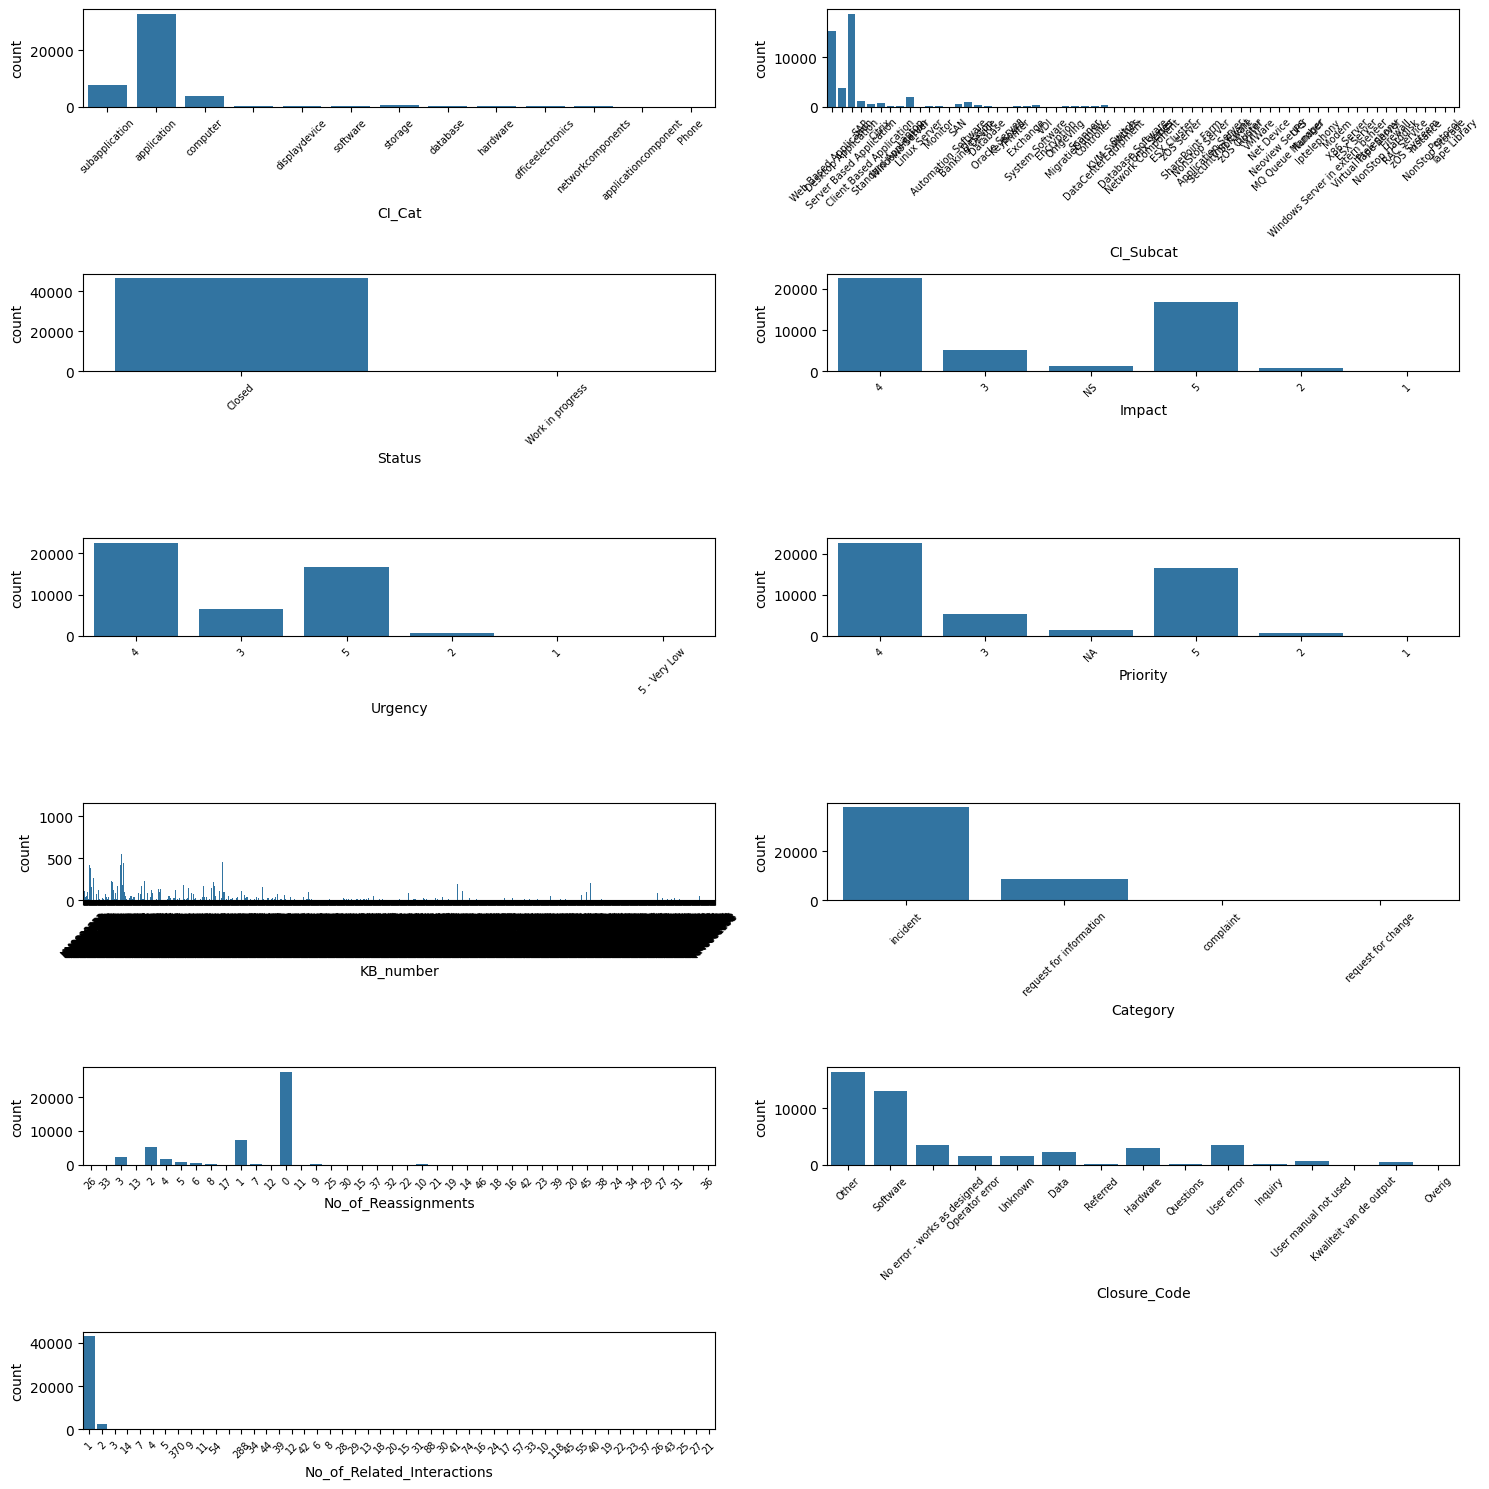

In [455]:
plt.figure(figsize=(15,15))
count = 1
for i in cat_columns:
  if count<13:
    ax = plt.subplot(6,2,count)
    sns.countplot(df,x=i)
    plt.xticks(rotation=45,size=7
               )

    count+=1
plt.tight_layout()
plt.show()

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

In [457]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [458]:
df.duplicated().sum()

0

# Feature engenering

## Missing Values handling


#### ci_cat

In [459]:
df.loc[df['CI_Cat']==''].head(2)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
316,OVR000033,,,WBS000118,IM0000385,Closed,5,5,5,0.278675964,incident,KM0001172,closed,5,04-09-2013 11:46,,,17-12-2013 10:56,"5,28,16,66,667",Unknown,1,SD0000582,23,,
538,OVR000078,,,WBS000187,IM0000625,Closed,3,3,3,0.386610757,incident,KM0000441,closed,4,23-09-2013 09:24,,,01-10-2013 12:17,"5,61,38,88,889",Software,1,SD0000843,,,


In [460]:
condition = df['CI_Cat']==''
df.loc[condition, 'CI_Cat'] = np.nan

In [461]:
df = df.dropna(subset=['CI_Cat'])

##### *CI_Subcat*

In [462]:
df.CI_Subcat.value_counts().head(5)
# no missing value or wrong value

,count
CI_Subcat,
Server Based Application,18811
Web Based Application,15311
Desktop Application,3876
Laptop,1921
SAP,1199


#### Impact

In [463]:
df.Impact.value_counts()

,count
Impact,
4,22528
5,16682
3,5221
NS,1377
2,684
1,3


In [464]:
condition = df['Impact']=='NS'
df = df.drop(df[condition].index)

In [465]:
df.Impact.value_counts()

,count
Impact,
4,22528
5,16682
3,5221
2,684
1,3


#### Urgency

In [466]:
df.Urgency.value_counts()

,count
Urgency,
4,22529
5,16719
3,5175
2,688
1,6
5 - Very Low,1


In [467]:
df.loc[df['Urgency']=='5 - Very Low'] = df.loc[df['Urgency']=='5 - Very Low'].replace('5 - Very Low','6')

In [468]:
df.Urgency.value_counts()

,count
Urgency,
4,22529
5,16719
3,5175
2,688
1,6
6,1


#### Closure_Code

In [469]:
df.Closure_Code.value_counts()

,count
Closure_Code,
Other,16079
Software,12698
No error - works as designed,3441
User error,3293
Hardware,2822
Data,2115
Unknown,1528
Operator error,1499
User manual not used,743


In [470]:
df.loc[df['Closure_Code']==''].head(2)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
9275,CBD000819,computer,Banking Device,WBS000146,IM0009440,Closed,2,2,2,0.605164167,incident,KM0000274,closed,1,30-10-2013 12:42,,,15-11-2013 14:09,"385,45",,1,SD0025464,,,
9488,CBD001232,computer,Banking Device,WBS000146,IM0009653,Closed,4,4,4,0.006817522,incident,KM0000274,closed,3,31-10-2013 07:59,,,04-11-2013 11:17,"2,43,07,77,778",,1,SD0026214,,,


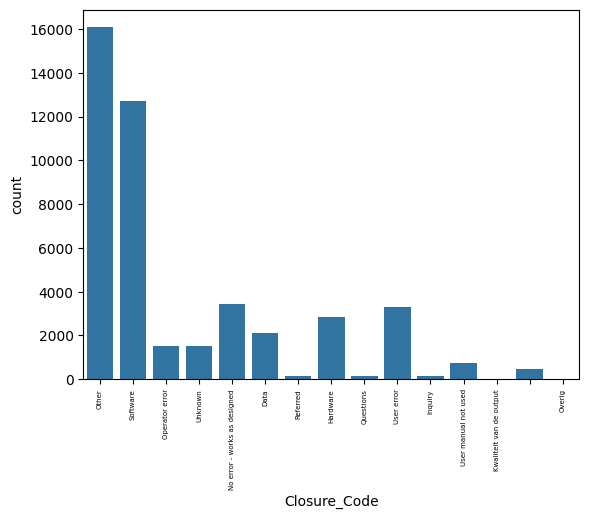

In [471]:
sns.countplot(df,x='Closure_Code')
plt.xticks(rotation=90,size=5)
plt.show()

In [472]:
print(len(df.loc[df['Closure_Code']==''])/len(df))
df['Closure_Code'] = df['Closure_Code'].replace('',np.nan)
df=df.dropna(subset=['Closure_Code'])

0.009951682255419123


In [473]:
df.Closure_Code.value_counts()

,count
Closure_Code,
Other,16079
Software,12698
No error - works as designed,3441
User error,3293
Hardware,2822
Data,2115
Unknown,1528
Operator error,1499
User manual not used,743


#### No_of_Related_Incidents

In [474]:
df.No_of_Related_Incidents.value_counts().head()

,count
No_of_Related_Incidents,
,43516
1,996
2,71
3,20
4,12


In [475]:
df['No_of_Related_Incidents'] = df['No_of_Related_Incidents'].replace('','0')
df['No_of_Related_Incidents'].value_counts().head()

<ipython-input-475-ffadbcdd1a79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_Related_Incidents'] = df['No_of_Related_Incidents'].replace('','0')


,count
No_of_Related_Incidents,
0,43516
1,996
2,71
3,20
4,12


#### No_of_Reassignments

In [476]:
df.No_of_Reassignments.value_counts().head()

,count
No_of_Reassignments,
0,26156
1,6945
2,5230
3,2118
4,1574


In [477]:
df.No_of_Reassignments=df['No_of_Reassignments'].replace('','0')

#### No_of_Related_Interactions

In [478]:
# df.loc[df['No_of_Related_Interactions']==''].head()
df.No_of_Related_Interactions.value_counts().head()

,count
No_of_Related_Interactions,
1,41228
2,2649
3,419
4,120
,114


In [479]:
df['No_of_Related_Interactions']=df['No_of_Related_Interactions'].replace('','1')

#### No_of_Related_Changes

In [480]:
df['No_of_Related_Changes'].value_counts()


,count
No_of_Related_Changes,
,44147
1,499
2,20
3,2
9,1


In [481]:
df['No_of_Related_Changes'] = df.No_of_Related_Changes.replace('','0')
df['No_of_Related_Changes'].value_counts().head()

,count
No_of_Related_Changes,
0,44147
1,499
2,20
3,2
9,1


## Columns Remove

In [482]:
df.drop('Incident_ID',axis=1,inplace=True)
df.drop("Related_Interaction",axis=1,inplace=True)
df.drop('Related_Change',axis=1,inplace=True)
df.drop('Alert_Status',inplace=True,axis=1)

In [483]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,SUB000508,subapplication,Web Based Application,WBS000162,Closed,4,4,4,0.601292279,incident,KM0000553,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,2,0
1,WBA000124,application,Web Based Application,WBS000088,Closed,3,3,3,0.415049969,incident,KM0000611,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,1,0
3,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.642927218,incident,KM0000611,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,0,0
4,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.345258343,incident,KM0000611,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,0,0
5,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.006675648,incident,KM0000611,4,10-08-2012 11:27,,08-11-2013 13:54,08-11-2013 13:54,"3,38,34,36,944",Other,1,0,0


In [484]:
df.shape

(44669, 21)

In [485]:
df.isna().sum()

,0
CI_Name,0
CI_Cat,0
CI_Subcat,0
WBS,0
Status,0
Impact,0
Urgency,0
Priority,0
number_cnt,0
Category,0


# Handling Mixed Variables


##### CI_Name

In [486]:
df.CI_Name.value_counts().head(5)

,count
CI_Name,
SUB000456,3042
SBA000263,2169
SBA000607,1737
SBA000462,1693
WBA000058,1613


In [487]:
# extract the last bit of CI_Name as number
df['CI_Name_num'] = df['CI_Name'].str.extract('(\d+)')
df['CI_Name_num'] = pd.to_numeric(df['CI_Name_num'], errors='coerce')

# Extract categorical part
df['CI_Name_cat'] = df['CI_Name'].str.replace('\d+', '', regex=True).str.strip()

WBS

In [488]:
# extract the last bit of CI_Name as number
df['WBS_num'] = df['WBS'].str.extract('(\d+)')
df['WBS_num'] = pd.to_numeric(df['WBS_num'], errors='coerce')

# Extract categorical part
df['WBS_cat'] = df['WBS'].str.replace('\d+', '', regex=True).str.strip()

KB_number

In [489]:
# extract the last bit of CI_Name as number
df['KB_number_num'] = df['KB_number'].str.extract('(\d+)')
df['KB_number_num'] = pd.to_numeric(df['KB_number_num'], errors='coerce')

# Extract categorical part
df['KB_number_cat'] = df['KB_number'].str.replace('\d+', '', regex=True).str.strip()

In [490]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,CI_Name_num,CI_Name_cat,WBS_num,WBS_cat,KB_number_num,KB_number_cat
0,SUB000508,subapplication,Web Based Application,WBS000162,Closed,4,4,4,0.601292279,incident,KM0000553,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,2,0,508,SUB,162,WBS,553,KM
1,WBA000124,application,Web Based Application,WBS000088,Closed,3,3,3,0.415049969,incident,KM0000611,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,1,0,124,WBA,88,WBS,611,KM
3,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.642927218,incident,KM0000611,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,0,0,124,WBA,88,WBS,611,KM
4,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.345258343,incident,KM0000611,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,0,0,124,WBA,88,WBS,611,KM
5,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.006675648,incident,KM0000611,4,10-08-2012 11:27,,08-11-2013 13:54,08-11-2013 13:54,"3,38,34,36,944",Other,1,0,0,124,WBA,88,WBS,611,KM


In [491]:
# copy
df_extra = df.copy()

In [492]:
# drop merge columns
df.drop('CI_Name',axis=1,inplace=True)
df.drop('WBS',axis=1,inplace=True)
df.drop('KB_number',axis=1,inplace=True)
df.drop('WBS_cat',axis=1,inplace=True)
df.drop('KB_number_cat',axis=1,inplace=True)

In [493]:
df.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,CI_Name_num,CI_Name_cat,WBS_num,KB_number_num
0,subapplication,Web Based Application,Closed,4,4,4,0.601292279,incident,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,2,0,508,SUB,162,553
1,application,Web Based Application,Closed,3,3,3,0.415049969,incident,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,1,0,124,WBA,88,611
3,application,Web Based Application,Closed,4,4,4,0.642927218,incident,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,0,0,124,WBA,88,611
4,application,Web Based Application,Closed,4,4,4,0.345258343,incident,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,0,0,124,WBA,88,611
5,application,Web Based Application,Closed,4,4,4,0.006675648,incident,4,10-08-2012 11:27,,08-11-2013 13:54,08-11-2013 13:54,"3,38,34,36,944",Other,1,0,0,124,WBA,88,611


In [494]:
df.shape

(44669, 22)

In [495]:
df.isna().sum()

,0
CI_Cat,0
CI_Subcat,0
Status,0
Impact,0
Urgency,0
Priority,0
number_cnt,0
Category,0
No_of_Reassignments,0
Open_Time,0


# Encoding

In [496]:
# Loop through columns and apply LabelEncoder
cat_columns = ['CI_Cat','CI_Subcat','Status','CI_Name_cat','Category','Closure_Code'] # Changed to a list

for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


# scaling

In [497]:
scale = ['CI_Name_num','CI_Name_cat','WBS_num','KB_number_num']
# scale = pd.DataFrame(scale)


In [498]:

for col in scale:
    mm = MinMaxScaler()
    df[col] = mm.fit_transform(df[[col]]) # Changed df[col] to df[[col]] to make it a 2D array

In [499]:
df.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,CI_Name_num,CI_Name_cat,WBS_num,KB_number_num
0,11,55,0,4,4,4,0.601292279,1,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",6,1,2,0,0.255416,0.759259,0.476331,0.233178
1,1,55,0,3,3,3,0.415049969,1,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",10,1,1,0,0.061965,0.925926,0.257396,0.257723
3,1,55,0,4,4,4,0.642927218,1,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",5,1,0,0,0.061965,0.925926,0.257396,0.257723
4,1,55,0,4,4,4,0.345258343,1,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",6,1,0,0,0.061965,0.925926,0.257396,0.257723
5,1,55,0,4,4,4,0.006675648,1,4,10-08-2012 11:27,,08-11-2013 13:54,08-11-2013 13:54,"3,38,34,36,944",6,1,0,0,0.061965,0.925926,0.257396,0.257723


In [500]:
df.shape

(44669, 22)

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44669 entries, 0 to 46605
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      44669 non-null  int64  
 1   CI_Subcat                   44669 non-null  int64  
 2   Status                      44669 non-null  int64  
 3   Impact                      44669 non-null  object 
 4   Urgency                     44669 non-null  object 
 5   Priority                    44669 non-null  object 
 6   number_cnt                  44669 non-null  object 
 7   Category                    44669 non-null  int64  
 8   No_of_Reassignments         44669 non-null  object 
 9   Open_Time                   44669 non-null  object 
 10  Reopen_Time                 44669 non-null  object 
 11  Resolved_Time               44669 non-null  object 
 12  Close_Time                  44669 non-null  object 
 13  Handle_Time_hrs             44669 no

## DataType Change

In [502]:

df['number_cnt'] = df['number_cnt'].astype('float64')
df['No_of_Reassignments'] = df['No_of_Reassignments'].astype('int64')
df['No_of_Related_Interactions'] = df['No_of_Related_Interactions'].astype('int64')
df['No_of_Related_Incidents'] = df['No_of_Related_Incidents'].astype('int64')
df['No_of_Related_Changes'] = df['No_of_Related_Changes'].astype('int64')

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44669 entries, 0 to 46605
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      44669 non-null  int64  
 1   CI_Subcat                   44669 non-null  int64  
 2   Status                      44669 non-null  int64  
 3   Impact                      44669 non-null  object 
 4   Urgency                     44669 non-null  object 
 5   Priority                    44669 non-null  object 
 6   number_cnt                  44669 non-null  float64
 7   Category                    44669 non-null  int64  
 8   No_of_Reassignments         44669 non-null  int64  
 9   Open_Time                   44669 non-null  object 
 10  Reopen_Time                 44669 non-null  object 
 11  Resolved_Time               44669 non-null  object 
 12  Close_Time                  44669 non-null  object 
 13  Handle_Time_hrs             44669 no

In [504]:
df.shape

(44669, 22)

In [505]:
df_c = df[['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Priority',
       'number_cnt', 'Category', 'No_of_Reassignments',
       'Closure_Code', 'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes', 'CI_Name_num', 'WBS_num',
       'KB_number_num']]

In [506]:
df_c.shape

(44669, 16)

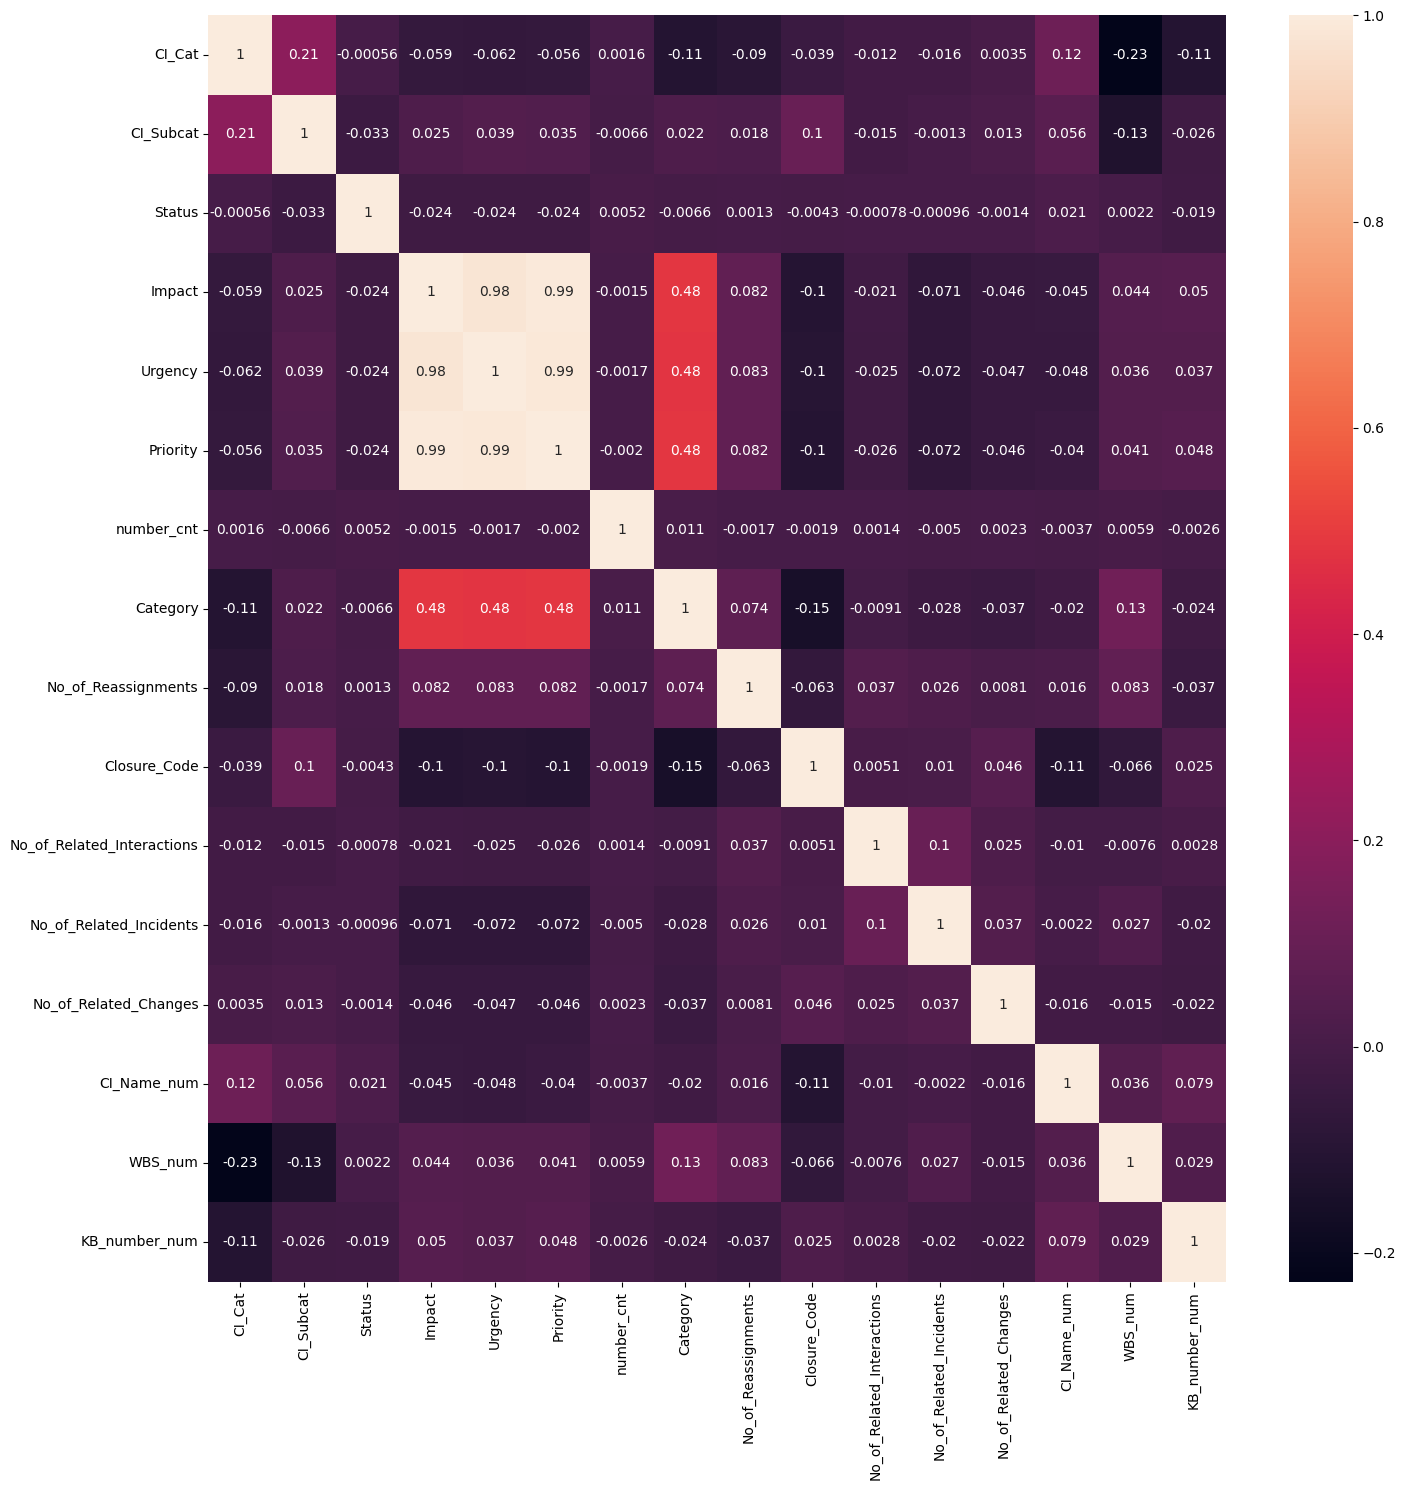

In [507]:
plt.figure(figsize=(15,15))
sns.heatmap(df_c.corr(),annot=True)
plt.tight_layout()
plt.show()

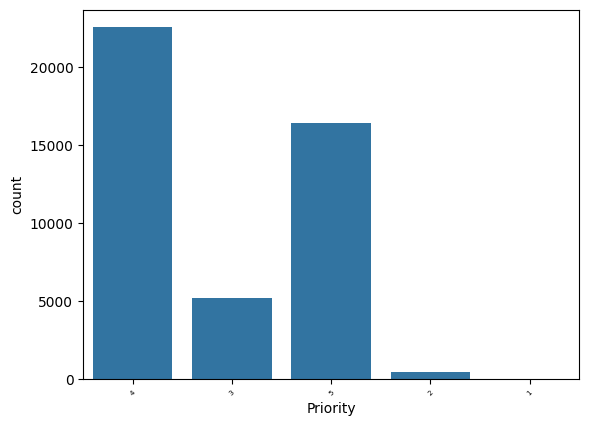

In [508]:
sns.countplot(df_c,x='Priority')
plt.xticks(rotation=45,size=5)
plt.show()

## Model Creation

In [509]:
X = df_c.drop('Priority',axis=1)
y = df_c['Priority']

In [510]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [511]:
# Balancing
smote=SMOTE(random_state=42, k_neighbors=1) # Set k_neighbors to 2 or less
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Model Testing

##### Logestic Regreesion

In [512]:
LR = LogisticRegression()
LR.fit(X_train_resampled,y_train_resampled)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [513]:
y_pred = LR.predict(X_test)

In [514]:
print(accuracy_score(y_test,y_pred))

0.8077009178419521


In [515]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2,3,4
0,0,1,0,0,0
1,1,89,3,0,0
2,0,64,921,70,15
3,0,55,198,3439,746
4,0,2,89,474,2767


In [516]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.42      0.96      0.59        93
           3       0.76      0.86      0.81      1070
           4       0.86      0.77      0.82      4438
           5       0.78      0.83      0.81      3332

    accuracy                           0.81      8934
   macro avg       0.57      0.68      0.60      8934
weighted avg       0.82      0.81      0.81      8934



#### Hyperparameter tunning

In [517]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [100] }

grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1)


In [518]:
grid_search.fit(X_train_resampled,y_train_resampled)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100],
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [519]:
grid_search.best_score_

1.0

In [520]:
best_params = grid_search.best_params_


In [521]:
best_logreg = grid_search.best_estimator_
print("Best Parameters: ", best_params)
y_pred = best_logreg.predict(X_test)

Best Parameters:  {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [522]:
# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9998880680546228
Precision: 0.9997773268746218
Recall: 0.9998880680546228
F1-Score: 0.9998324013652106
Confusion Matrix:
[[   0    1    0    0    0]
 [   0   93    0    0    0]
 [   0    0 1070    0    0]
 [   0    0    0 4438    0]
 [   0    0    0    0 3332]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LR after tunning

In [523]:
LR = LogisticRegression(C = 10, max_iter=100, penalty= 'l2', solver= 'newton-cg')
LR.fit(X_train_resampled,y_train_resampled)

LogisticRegression(C=10, solver='newton-cg')

In [524]:
y_pred = LR.predict(X_test)

In [525]:
print(accuracy_score(y_test,y_pred))

0.9998880680546228


In [526]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2,3,4
0,0,1,0,0,0
1,0,93,0,0,0
2,0,0,1070,0,0
3,0,0,0,4438,0
4,0,0,0,0,3332


In [527]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.99      1.00      0.99        93
           3       1.00      1.00      1.00      1070
           4       1.00      1.00      1.00      4438
           5       1.00      1.00      1.00      3332

    accuracy                           1.00      8934
   macro avg       0.80      0.80      0.80      8934
weighted avg       1.00      1.00      1.00      8934



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [528]:
y_test.tail()

,Priority
25314,4
42289,5
26330,4
35959,4
43842,4


In [529]:
X_test.tail(2)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,CI_Name_num,WBS_num,KB_number_num
35959,11,55,0,4,4,0.668617,1,0,10,1,0,0,0.213098,0.213018,0.296234
43842,1,44,0,4,4,0.196768,1,1,6,1,0,0,0.305290,0.775148,0.467203


# Forecast the incident volume

In [530]:
import pandas as pd

# Convert columns to datetime
df['Open_Time'] = pd.to_datetime(df['Open_Time'], format='%d-%m-%Y %H:%M')
df['Reopen_Time'] = pd.to_datetime(df['Reopen_Time'], format='%d-%m-%Y %H:%M', errors='coerce')
df['Resolved_Time'] = pd.to_datetime(df['Resolved_Time'], format='%d-%m-%Y %H:%M', errors='coerce')
df['Close_Time'] = pd.to_datetime(df['Close_Time'], format='%d-%m-%Y %H:%M', errors='coerce')

In [531]:
# Convert Handle_Time_hrs to numeric, removing commas and handling conversion
df['Handle_Time_hrs'] = df['Handle_Time_hrs'].str.replace(',', '')
df['Handle_Time_hrs'] = pd.to_numeric(df['Handle_Time_hrs'])


In [532]:
print(df[['Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs']].sample(5))

                Open_Time         Reopen_Time       Resolved_Time  \
35216 2014-02-10 11:51:00                 NaT                 NaT   
2112  2013-10-03 10:31:00                 NaT                 NaT   
39308 2014-02-26 09:56:00 2014-03-12 08:02:00                 NaT   
44889 2014-03-21 15:34:00                 NaT 2014-03-21 15:39:00   
3223  2013-10-07 15:51:00                 NaT 2013-10-08 15:03:00   

               Close_Time  Handle_Time_hrs  
35216 2014-02-10 12:29:00     6.436111e+08  
2112  2013-10-03 11:08:00     5.655556e+08  
39308 2014-03-25 17:47:00     4.668167e+09  
44889 2014-03-21 15:39:00     7.000000e+00  
3223  2013-10-08 15:03:00     9.692222e+09  


In [533]:
# Resample the data on a quarterly basis
df_quarterly = df.resample('Q', on='Open_Time').size().reset_index(name='Incident_Count')

# Resample the data on an annual basis
df_annual = df.resample('A', on='Open_Time').size().reset_index(name='Incident_Count')

print(df_quarterly.head())
print(df_annual.head())


   Open_Time  Incident_Count
0 2012-03-31               2
1 2012-06-30               0
2 2012-09-30               7
3 2012-12-31              10
4 2013-03-31              24
   Open_Time  Incident_Count
0 2012-12-31              19
1 2013-12-31           23592
2 2014-12-31           21058


In [534]:
from prophet import Prophet

# Prepare data for Prophet
df_quarterly.rename(columns={'Open_Time': 'ds', 'Incident_Count': 'y'}, inplace=True)

In [535]:
# Initialize and train the model
model = Prophet()
model.fit(df_quarterly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn0xm_og6/jf6uvhlf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn0xm_og6/qc3i134_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31022', 'data', 'file=/tmp/tmpn0xm_og6/jf6uvhlf.json', 'init=/tmp/tmpn0xm_og6/qc3i134_.json', 'output', 'file=/tmp/tmpn0xm_og6/prophet_modelroobui4t/prophet_model-20240904053853.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:38:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:38:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [536]:
# Create a DataFrame to hold future dates
future_quarters = model.make_future_dataframe(periods=8, freq='Q')  # Forecast for 2 years (8 quarters)
# Predict the future incidents
forecast = model.predict(future_quarters)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


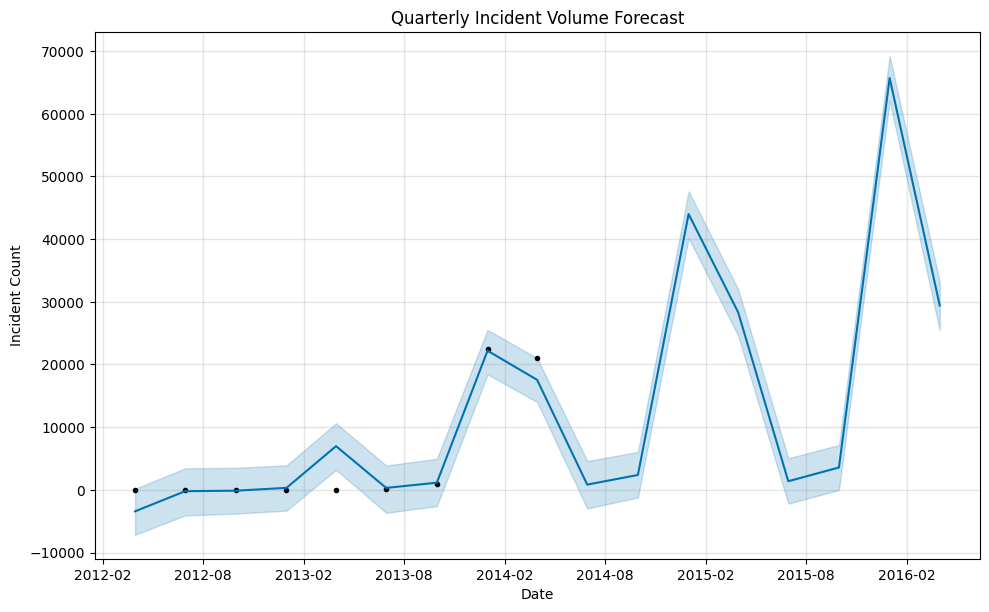

In [537]:
# Visualize the forecast
model.plot(forecast)
plt.title('Quarterly Incident Volume Forecast')
plt.xlabel('Date')
plt.ylabel('Incident Count')
plt.show()

In [538]:
# Forecasting on an annual basis
df_annual.rename(columns={'Open_Time': 'ds', 'Incident_Count': 'y'}, inplace=True)

# Train the model on annual data
model_annual = Prophet()
model_annual.fit(df_annual)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn0xm_og6/8st1qvk9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn0xm_og6/v0mu0n6g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80662', 'data', 'file=/tmp/tmpn0xm_og6/8st1qvk9.json', 'init=/tmp/tmpn0xm_og6/v0mu0n6g.json', 'output', 'file=/tmp/tmpn0xm_og6/prophet_modelw1gf6y50/prophet_model-20240904053854.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:38:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:38:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [539]:
# Create a DataFrame to hold future dates
future_years = model_annual.make_future_dataframe(periods=5, freq='Y')  # Forecast for 5 years

# Predict the future incidents
forecast_annual = model_annual.predict(future_years)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


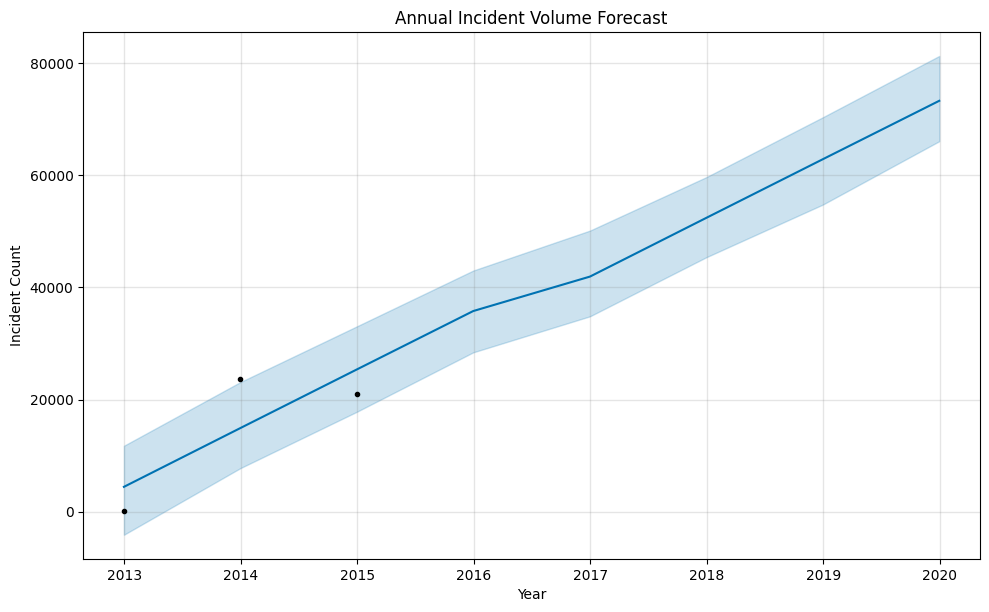

In [540]:
# Visualize the forecast
model_annual.plot(forecast_annual)
plt.title('Annual Incident Volume Forecast')
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.show()

### Label set

In [596]:
df_c.sample(10)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,CI_Name_num,WBS_num,KB_number_num
33398,1,44,0,3,3,3,0.502304,1,0,0,1,0,0,0.214610,0.905325,0.570461
28203,11,55,0,4,4,4,0.640683,1,9,6,1,0,0,0.255416,0.476331,0.233178
23875,1,55,0,3,3,3,0.715833,1,0,12,1,0,0,0.056927,0.032544,0.242912
3345,1,41,0,4,4,4,0.126594,1,0,6,1,0,0,0.001008,0.798817,0.491325
15876,1,44,0,5,5,5,0.547713,3,2,6,1,0,0,0.306297,0.775148,0.771477
1102,1,44,0,4,4,4,0.024559,1,2,4,1,0,0,0.230227,0.213018,0.662717
25056,11,55,0,4,4,4,0.513738,1,0,6,1,0,0,0.229219,0.213018,0.733813
733,1,10,0,5,5,5,0.479120,3,4,4,1,0,0,0.028212,0.275148,0.593737
10455,1,44,0,5,5,5,0.982760,3,0,4,1,0,0,0.346599,0.671598,0.276767
8309,1,44,0,5,5,5,0.440185,3,0,4,1,0,0,0.346599,0.671598,0.276767


In [610]:
pred_val = np.array([1,55	,0,	3	,3,		0.715833,	1,	0,	12,	1	,0,	0,	0.056927,	0.032544,	0.242912]).reshape(1,-1)
prio = LR.predict(pred_val)
first_val = pred_val[0][0]
first_val = first_val.astype(int)
prio=prio.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [611]:
def priority(prio):
    if prio == 1:
      return 'High'
    elif prio == 2:
      return 'High'
    elif prio == 3:
      return 'medium'
    else:
      return 'low'
priority(prio)


'medium'

In [612]:
def label(first_val):
            ci_for_conv = df_extra['CI_Cat']
            ci_for_conv.head()
            label_encoder = LabelEncoder()
            label_encoder.fit(ci_for_conv)

            # Let's say the encoded value you want to reverse is 3
            encoded_value = first_val

            # Get the original string value
            original_value = label_encoder.inverse_transform([encoded_value])[0]
print(f"The original value for the encoded value {encoded_value} is {original_value}")
print("beacause preduction is ",prio,' priority will be. ',priority(prio))


The original value for the encoded value 0 is Phone
beacause preduction is  [3]  priority will be.  medium


In [615]:
df_copy.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


## predicting RAC(Request for change)

In [622]:
df_extra.Category.value_counts()

,count
Category,
incident,35870
request for information,8787
complaint,11
request for change,1


In [629]:
X = df_c.drop('Category',axis=1)
y = df_c['Category']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [630]:
smote=SMOTE(random_state=42, k_neighbors=1) # Set k_neighbors to 2 or less
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [627]:
y_pred = lr.predict(X_test)

In [633]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier()

In [634]:
y_pred = dt.predict(X_test)

In [635]:
print(accuracy_score(y_test,y_pred))

0.964965301096933
